In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 7)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 다중 선형 회귀(Multiple Linear Regression)
- 특성 데이터가 여러개 
- y = w1*x1 + w2*x2 + w3*x3 ... + b

In [6]:
# 성적 데이터 불러오기
df = pd.read_csv('data/data-01.csv', header=None, names=['q1', 'q2', 'midterm', 'final'])
df.head()

,q1,q2,midterm,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


특성 데이터 컬럼: 'q1', 'q2', 'midterm'

라벨(타켓) 데이터 컬럼: 'final'

In [7]:
# 특성, 타겟 데이터 구성
x_data = df.drop('final', axis=1)
y_data = df['final']

In [12]:
# 학습, 테스트 데이터 구성
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [13]:
# 선형 회귀 학습
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [14]:
# w, b값
model_lr.coef_, model_lr.intercept_

(array([0.32701096, 0.47623583, 1.2409752 ]), -2.69104102582628)

특성 데이터가 3개 이므로 w값도 3개

In [32]:
# 위의 w, b값을 이용해 q1: 70, q2: 75, midterm: 75인 경우 예측
model_lr.coef_[0] * 70 + model_lr.coef_[1] * 75 + model_lr.coef_[2] * 75 + model_lr.intercept_

148.9905530712443

In [33]:
# matmul 메서드 사용
# 1x3, 3x1 행렬곱
np.matmul(model_lr.coef_, [[70], [75], [75]]) + model_lr.intercept_

array([148.99055307])

In [39]:
# predict 메서드 사용
# 데이터 프레임으로 학습했기 때문에 데이터 프레임으로 입력을 넣어줘야 한다.
df2 = pd.DataFrame({'q1': [70], 'q2': [75], 'midterm': [75]})
model_lr.predict(df2)

array([148.99055307])

In [15]:
# 학습 데이터 score
model_lr.score(x_train, y_train)

0.9871515005959172

In [16]:
# 테스트 데이터 score
model_lr.score(x_test, y_test)

0.9886447022939627

In [17]:
# 예측값
y_pred = model_lr.predict(x_test)
y_pred

array([104.80102375, 181.4381625 , 157.89847776, 142.91981433,
       142.98721955])

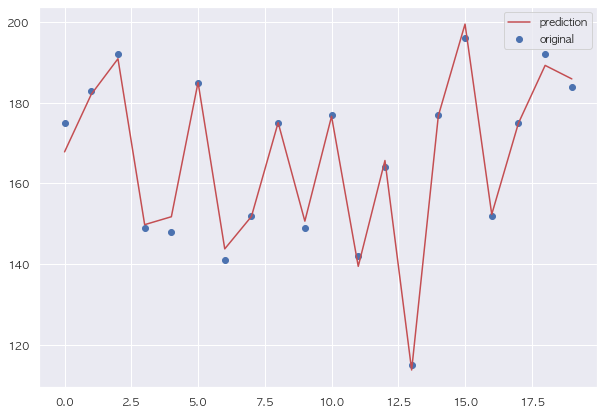

In [40]:
# 학습 데이터에 대한 시각화
plt.scatter(range(len(y_train)), y_train.values, label='original')
plt.plot(model_lr.predict(x_train), label='prediction', c='r')
plt.legend()
plt.show()

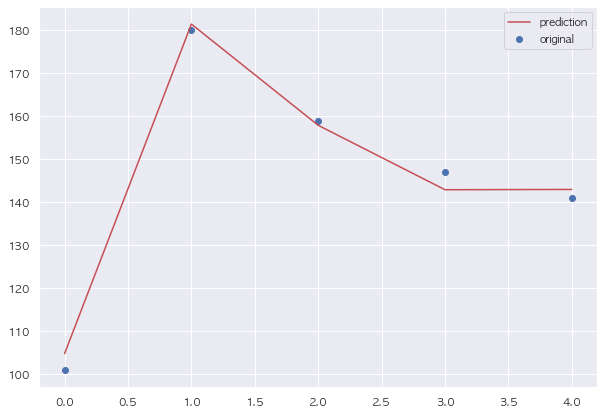

In [30]:
# 테스트 데이터에 대한 시각화
plt.scatter(range(len(y_test)), y_test.values, label='original')
plt.plot(y_pred, label='prediction', c='r')
plt.legend()
plt.show()